In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [11]:
df = pd.read_csv('BRBY.csv')

In [12]:
ticket='BRBY'
df['Close']=df['Close'].astype(float)

In [16]:
df.describe()

,Close,MA10,MA50
count,2705.00000,2519.000000,1954.000000
mean,1692.63597,1694.085447,1685.373947
std,353.12075,340.154801,295.294128
min,571.00000,600.740000,794.360000
25%,1457.00000,1459.850000,1466.672500
50%,1716.00000,1717.600000,1707.220000
75%,1915.00000,1907.525000,1866.587500
max,2641.00000,2606.700000,2486.900000


In [17]:
df['Close'].dropna

<bound method Series.dropna of 0        586.8
1        592.4
2        584.4
3        580.0
4        571.0
         ...  
2723    1450.0
2724    1480.0
2725    1505.0
2726    1513.0
2727    1502.0
Name: Close, Length: 2728, dtype: float64>

In [18]:
df['MA10'] = df['Close'].rolling(10).mean()
df['MA50'] = df['Close'].rolling(50).mean()

In [19]:
import plotly.express as px
px.line(df[['Close', 'MA10','MA50']])

In [22]:
# Long or not?

df['Shares'] = [ 1 if df.loc[ei,'MA10']>df.loc[ei,'MA50'] else 0 for ei in df.index]

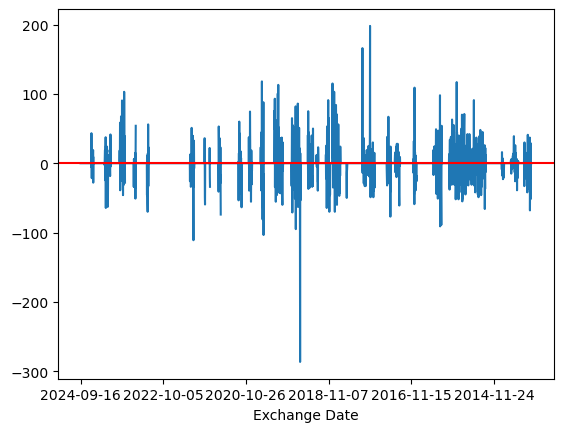

In [25]:
# Daily profit
df['Close1']=df['Close'].shift(-1)
# df.iloc[500:505,:]

df['Profit'] = [df.loc[ei,'Close1']-df.loc[ei,'Close'] if df.loc[ei,'Shares']==1 else 0 for ei in df.index]
df['Profit'].plot()
plt.axhline(y=0,color='red')

In [30]:
# Cumulative wealth
df['wealth']=df['Profit'].cumsum()
df.head()

,Exchange Date,Close,MA10,MA50,Shares,Close1,Profit,wealth
Exchange Date,,,,,,,,
2024-09-16,2024-09-16,586.8,NaN,NaN,0,592.4,0.0,0.0
2024-09-13,2024-09-13,592.4,NaN,NaN,0,584.4,0.0,0.0
2024-09-12,2024-09-12,584.4,NaN,NaN,0,580.0,0.0,0.0
2024-09-11,2024-09-11,580.0,NaN,NaN,0,571.0,0.0,0.0
2024-09-10,2024-09-10,571.0,NaN,NaN,0,575.0,0.0,0.0


***The moving average does not show any buying opportunities despite a very low historical price level of the stock. The market signal may support the opinion that the stock may go lower. We shall compare with Estee Lauder(?).***

Total money you win is  -276.79999999999995
Total money you spent is  586.8


<Axes: xlabel='Exchange Date'>

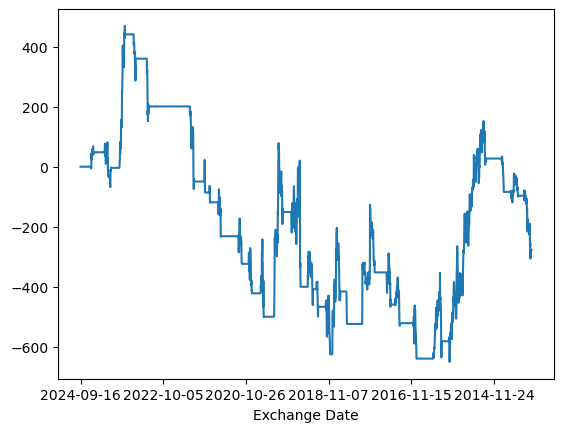

In [28]:
print('Total money you win is ', df.loc[df.index[-2],'wealth'])
print('Total money you spent is ', df.loc[df.index[0],'Close'])
df['wealth'].plot()

In [29]:
df.to_csv('BRBY_signal.csv')